In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from statsmodels.graphics.gofplots import qqplot
from joypy import joyplot

In [2]:
filepath = ".//Milk_Production_2007_2012.csv"
milk = pd.read_csv(filepath)
milk.columns = [i.lower() for i in milk.columns]
milk.set_index("states/uts", inplace = True)
milkMean = milk.mean()
milk = milk.fillna(milkMean)
# Changing index name to match with the index of egg dataframe
milk = milk.rename(index = {"Dadar & Nagar Haveli" : "Dadra & Nagar Haveli"})
milk

,2007-08,2008-09,2009-10,2010-11,2011-12
states/uts,,,,,
Andhra Pradesh,8925,9570,10429,11203,12088
Arunachal Pradesh,32,24,26,28,22
Assam,752,753,756,790,796
Bihar,5783,5934,6124,6517,6643
Chhattisgarh,866,908,956,1029,1119
Goa,58,59,59,60,60
Gujarat,7911,8386,8844,9321,9817
Haryana,5442,5745,6006,6267,6661
Himachal Pradesh,1007,1026,971,1102,1120


In [31]:
filepath = ".//Egg_Production_2007_2012.csv"
egg = pd.read_csv(filepath)
egg.columns = [(i.split())[0].lower() for i in egg.columns]
egg.set_index("states/uts", inplace = True)
eggMean = egg.mean()
egg = egg.fillna(eggMean)
# Changing index name to match with the index of milk dataframe
egg = egg.rename(index = {"Total" : "All India"})
egg

,2007-08,2008-09,2009-10,2010-11,2011-12
states/uts,,,,,
Andhra Pradesh,175884,183446,193958,201277,212103
Arunachal Pradesh,394,361,380,407,419
Assam,4910,4659,4671,4707,4705
Bihar,10707,10740,11002,7446,7552
Chhattisgarh,9184,9738,10520,12454,12984
Goa,152,149,148,149,149
Gujarat,8256,12675,12762,13269,14269
Haryana,41031,38150,38453,39644,41142
Himachal Pradesh,843,977,1000,1021,1050


In [4]:
frames = [milk, egg]
final = pd.concat(frames, axis = 1, keys = ["milk", "egg"])
final

milk                                     egg  \
                          2007-08 2008-09 2009-10 2010-11 2011-12 2007-08   
states/uts                                                                  
Andhra Pradesh               8925    9570   10429   11203   12088  175884   
Arunachal Pradesh              32      24      26      28      22     394   
Assam                         752     753     756     790     796    4910   
Bihar                        5783    5934    6124    6517    6643   10707   
Chhattisgarh                  866     908     956    1029    1119    9184   
Goa                            58      59      59      60      60     152   
Gujarat                      7911    8386    8844    9321    9817    8256   
Haryana                      5442    5745    6006    6267    6661   41031   
Himachal Pradesh             1007    1026     971    1102    1120     843   
Jammu & Kashmir              1519    1565    1592    1609    1614    6682   
Jharkhand                    1442    1466    1463    1555    1745    7130   
Karnataka                    4244    4538    4822    5114    5447   20181   
Kerala                       2253    2441    2509    2645    2716   13831   
Madhya Pradesh               6572    6855    7167    7514    8149    9747   
Maharashtra                  7210    7455    7679    8044    8469   34640   
Manipur                        78      79      78      78      79     845   
Meghalaya                      77      78      78      79      80     990   
Mizoram                        17      17      11      11      14     403   
Nagaland                       45      53      78      76      78     802   
Orissa                       1625    1598    1651    1671    1721   15479   
Punjab                       9282    9387    9389    9423    9551   37914   
Rajasthan                   11377   11931   12330   13234   13512    6730   
Sikkim                         42      42      44      43      45     135   
Tamil Nadu                   6540    6651    6787    6831    6968   83937   
Tripura                        91      96     100     104     111    1320   
Uttar Pradesh               18861   19537   20203   21031   22556    9814   
Uttarakhand                  1221    1230    1377    1383    1417    1911   
West Bengal                  4087    4176    4300    4471    4672   30542   
Andaman & Nicobar Islands      24      26      24      25      26     622   
Chandigarh                     47      47      46      45      45     282   
Dadra & Nagar Haveli           10      10      10      11      11      70   
Daman & Diu                     1       1       1       1       1      18   
Delhi                         445     450     466     480     502       1   
Lakshadweep                     2       2       2       2       2     128   
Puducherry                     47      46      46      47      45     137   
All India                  107934  112183  116425  121848  127904  535649   

                                                           
                          2008-09 2009-10 2010-11 2011-12  
states/uts                                                 
Andhra Pradesh             183446  193958  201277  212103  
Arunachal Pradesh             361     380     407     419  
Assam                        4659    4671    4707    4705  
Bihar                       10740   11002    7446    7552  
Chhattisgarh                 9738   10520   12454   12984  
Goa                           149     148     149     149  
Gujarat                     12675   12762   13269   14269  
Haryana                     38150   38453   39644   41142  
Himachal Pradesh              977    1000    1021    1050  
Jammu & Kashmir              7208    7242    7725    6520  
Jharkhand                    3995    3925    4153    4313  
Karnataka                   23688   29094   30674   34699  
Kerala                      15095   16330   16856   17049  
Madhya Pradesh               6713    7075    7577    7972  
Mahar

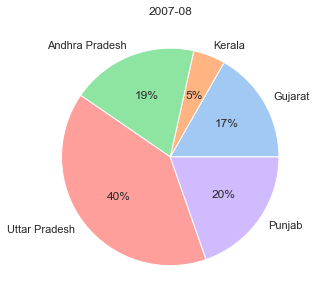

In [96]:
req_q2 = final["milk"].loc[["Gujarat" ,"Kerala", "Andhra Pradesh", "Uttar Pradesh","Punjab"], "2007-08"]
colors = sns.color_palette('pastel')[0:5]
label=req_q2.index.tolist()
plt.pie(req_q2.tolist(), labels=label,colors = colors, autopct='%.0f%%')
plt.title("2007-08")
plt.show()

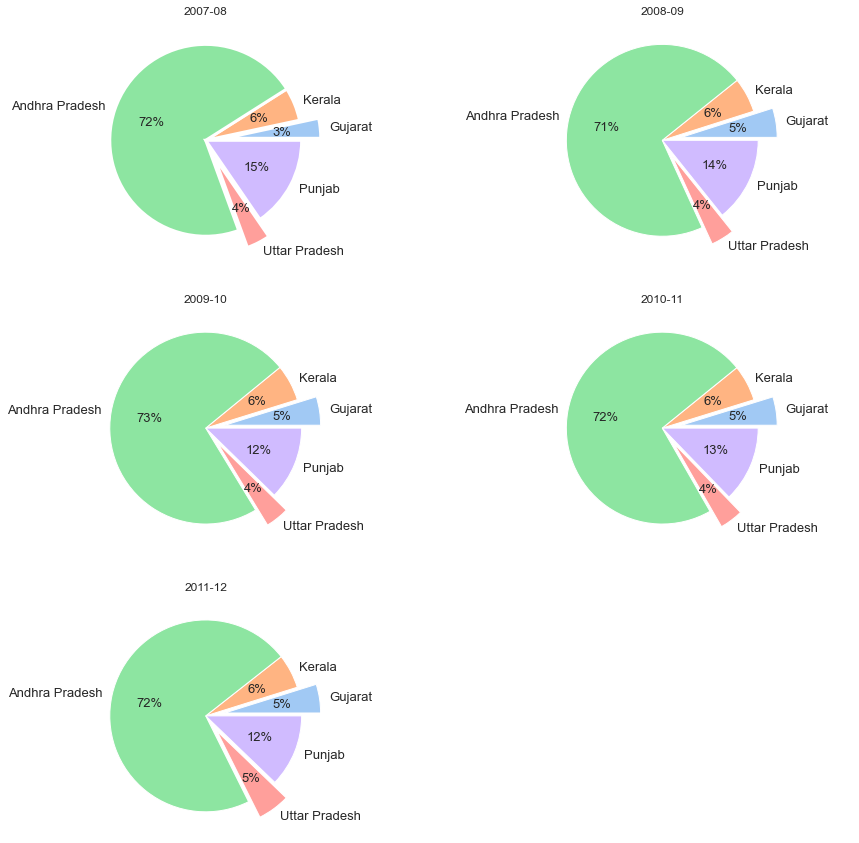

In [120]:
req_q3 = final["egg"].loc[["Gujarat" ,"Kerala", "Andhra Pradesh", "Uttar Pradesh","Punjab"], :]
label = req_q3.index.tolist()
colors = sns.color_palette('pastel')[0:5]
explode = [0.2, 0, 0, 0.2, 0]
fig, axes = plt.subplots(3,2,figsize=(15,15))
axes[0,0].pie(req_q3.iloc[:,0].tolist(),colors = colors, autopct='%.0f%%',textprops={'fontsize': 13}, labels = label, explode = explode,)
axes[0,0].set_title("2007-08")
axes[0,1].pie(req_q3.iloc[:,1].tolist(),colors = colors, autopct='%.0f%%',textprops={'fontsize': 13}, labels = label, explode = explode)
axes[0,1].set_title("2008-09")
axes[1,0].pie(req_q3.iloc[:,2].tolist(),colors = colors, autopct='%.0f%%',textprops={'fontsize': 13}, labels = label, explode = explode)
axes[1,0].set_title("2009-10")
axes[1,1].pie(req_q3.iloc[:,3].tolist(),colors = colors, autopct='%.0f%%',textprops={'fontsize': 13}, labels = label, explode = explode)
axes[1,1].set_title("2010-11")
axes[2,0].pie(req_q3.iloc[:,4].tolist(),colors = colors, autopct='%.0f%%',textprops={'fontsize': 13}, labels = label, explode = explode)
axes[2,0].set_title("2011-12")
axes[2,1].axis("off")
plt.show()

                            2007-08   2008-09   2009-10   2010-11   2011-12
states/uts                                                                 
Andhra Pradesh             0.181949  0.189771  0.200646  0.208217  0.219417
Arunachal Pradesh          0.200918  0.184090  0.193779  0.207547  0.213666
Assam                      0.207593  0.196981  0.197489  0.199011  0.198926
Bihar                      0.225662  0.226358  0.231880  0.156933  0.159167
Chhattisgarh               0.167347  0.177442  0.191691  0.226931  0.236589
Goa                        0.203481  0.199465  0.198126  0.199465  0.199465
Gujarat                    0.134834  0.207003  0.208424  0.216704  0.233036
Haryana                    0.206789  0.192269  0.193796  0.199798  0.207348
Himachal Pradesh           0.172357  0.199755  0.204457  0.208751  0.214680
Jammu & Kashmir            0.188880  0.203748  0.204709  0.218362  0.184301
Jharkhand                  0.303198  0.169884  0.166908  0.176603  0.183407
Karnataka   

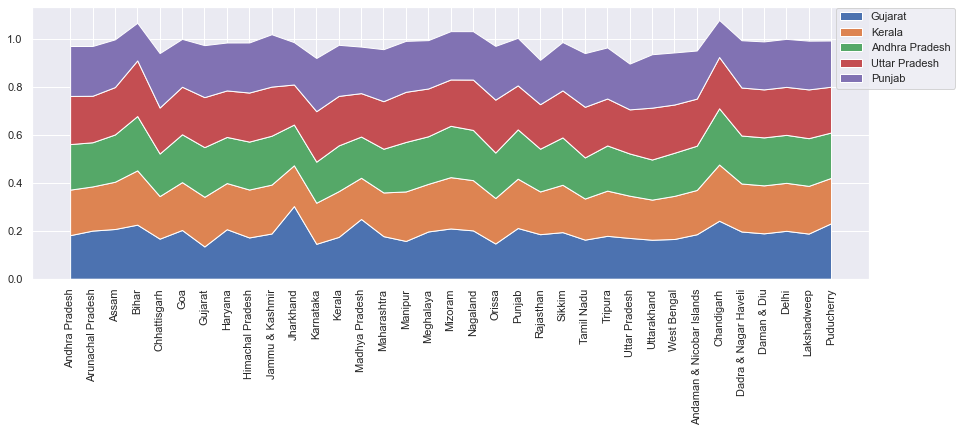

In [125]:
temp = final["egg"]
eggNorm = temp.T/temp.sum(axis = 1)
eggNorm = eggNorm.T
eggNorm = eggNorm.iloc[:-1]
print(eggNorm)
sns.set(rc = {'figure.figsize':(15,5)})
plt.stackplot(eggNorm.index.get_level_values("states/uts"), 
                eggNorm["2007-08"],
                eggNorm["2008-09"],
                eggNorm["2008-09"],
                eggNorm["2009-10"],
                eggNorm["2010-11"],
                labels = label)
plt.xticks(rotation = 90)
plt.legend(loc = (0.96,0.7))